In [1]:

#from scipy.spatial.distance import pdist,squareform
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


#from nltk.metrics import edit_distance
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer, util

d:\Eneca\task2\.venv\Lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [2]:
# 1. Load a pretrained Sentence Transformer model
#model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")
model= SentenceTransformer('distiluse-base-multilingual-cased')
#model= SentenceTransformer('google-bert/bert-base-uncased')

# # # The sentences to encode
# sentences = [
#     "Привет Илья.",
#     "Илья.",
#     "Молочная ферма",
# ]

# # 2. Calculate embeddings by calling model.encode()
# embeddings = model.encode(sentences)
# print(embeddings.shape)
# # [3, 384]

# # 3. Calculate the embedding similarities
# similarities = model.similarity(embeddings, embeddings)
# print(similarities)

d:\Eneca\task2\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
real_parts=['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
 'Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.',
 'Проектируемая молочно-товарная ферма доильно-молочного блока.',
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане с общими габаритными размерами 32,8х24,1 м. Отметка низа покрытия помещений приемки топлива плюс 6,900.',
 'Наружные стены  и кровля котельной с АБК предусмотрены из легких трехслойных металлических панелей типа «Сэндвич».',
 'Сопряжение металлических надколонников со сборными железобетонными колоннами и монолитными стенами является жёстким. Соединение металлических ферм и балок с надколонниками выполнено шарнирным.',
 'Устойчивость каркаса достигается за счет жесткого соединения монолитных фундаментов с железобетонными сборными колоннами с шарнирным опиранием стропильных конструкций в поперечном направлении, вертикальными связями и распорками по верху колонн - в продольном направлении. Горизонтальная жесткость обеспечивается за счет связей по верхним и нижним поясам ферм.',
 'Балки покрытия выполнены из горячекатаных металлоконструкций двутаврового сечения, стропильные фермы по серии 1.460.3-23.98 из замкнутых гнутосварных профилей.',
 'Сборные железобетонные колонны по оси 1 сечением 400х400 по серии 1.423.1-3/88, в осях 2-6 сечением 500х400 по серии 1.423.1-5/88.',
 'Перекрытия в осях 1-2, Б-Г выполнены из многопустотных железобетонных плит по серии 1.041-3 с монолитными участками по сборным железобетонным ригелям по серии 1.020-1/87.']

In [4]:
embeddings = model.encode(real_parts)
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities.shape)

(13, 512)
torch.Size([13, 13])


[[2.22044605e-16 6.37090776e-01 8.60906705e-01 9.93732112e-01
  7.95970517e-01 7.03878090e-01 7.26505120e-01 8.55389592e-01
  7.29819521e-01 7.42251044e-01 8.21831882e-01 9.31945128e-01
  8.12382459e-01]
 [6.37090776e-01 0.00000000e+00 9.58790106e-01 9.75009797e-01
  6.32496354e-01 5.00868966e-01 3.37823827e-01 9.69264779e-01
  8.98517908e-01 7.93186073e-01 8.42557137e-01 7.82181120e-01
  7.44689350e-01]
 [8.60906705e-01 9.58790106e-01 0.00000000e+00 3.28543579e-01
  1.07563245e+00 8.72148559e-01 9.64680669e-01 9.51075033e-01
  9.67530710e-01 1.04541957e+00 7.48949836e-01 1.03217995e+00
  9.47778473e-01]
 [9.93732112e-01 9.75009797e-01 3.28543579e-01 0.00000000e+00
  1.07296880e+00 9.59758869e-01 9.86703708e-01 9.95054066e-01
  1.02099142e+00 1.09132958e+00 7.96474422e-01 1.11674297e+00
  9.35896633e-01]
 [7.95970517e-01 6.32496354e-01 1.07563245e+00 1.07296880e+00
  0.00000000e+00 6.35089720e-01 6.08782670e-01 7.31549102e-01
  4.72217138e-01 6.58409811e-01 6.73561213e-01 6.43325098e-0

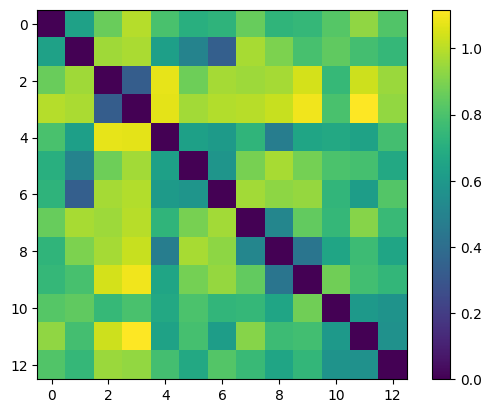

In [5]:

# Ваш список векторов
# vectors_ex = [np.array([1, 2]), np.array([2, 3]), np.array([3, 4])]

# Преобразование списка векторов в матрицу
matrix = np.vstack(embeddings)

# Расчет евклидового расстояния между векторами
distances = cdist(matrix, matrix, 'cosine')
print(distances)
# Построение графика
plt.imshow(distances)
plt.colorbar()
plt.show()
# # Определение минимального и максимального значения для обратного цветового шкалы
# vmin = distances.max()
# vmax = distances.min()

# # Построение графика с |обратными цветами
# plt.imshow(distances, interpolation='nearest', cmap='hot', vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.show()

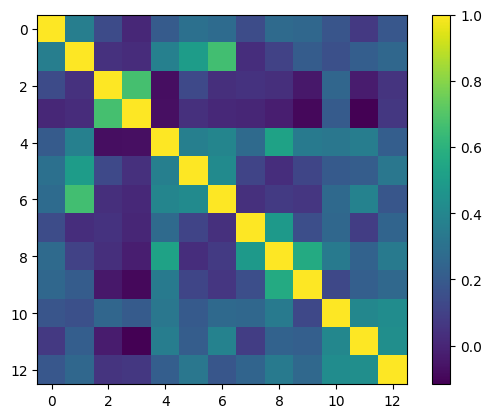

In [6]:

# Ваш список векторов
# vectors_ex = [np.array([1, 2]), np.array([2, 3]), np.array([3, 4])]

# Преобразование списка векторов в матрицу
#matrix = np.vstack(CLS_embedded_token_of_each_sentence_nparray)

# Расчет евклидового расстояния между векторами
distances = similarities

# Построение графика
plt.imshow(distances)
plt.colorbar()
plt.show()
# # Определение минимального и максимального значения для обратного цветового шкалы
# vmin = distances.max()
# vmax = distances.min()

# # Построение графика с обратными цветами
# plt.imshow(distances, interpolation='nearest', cmap='hot', vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.show()

In [7]:
np.sum(np.array(distances[2]))

2.2463644

In [8]:
np.sum(np.array(distances[12]))

3.9921865

In [9]:
np.sum(np.array(distances),axis=0)

array([3.388297 , 3.9275239, 2.2463644, 1.7267941, 4.2160687, 3.7429836,
       3.7903948, 2.8743732, 3.9917498, 3.170706 , 4.1321573, 3.4606047,
       3.992187 ], dtype=float32)

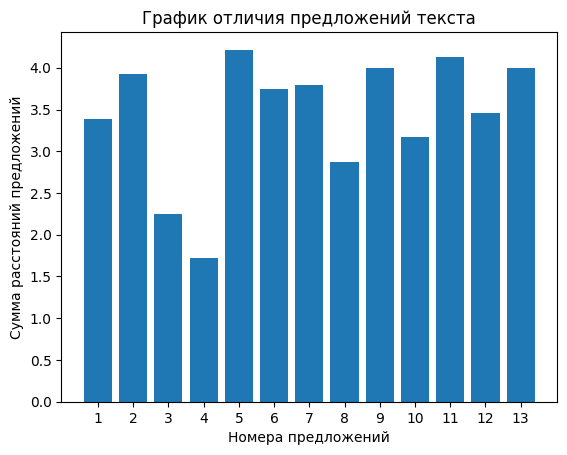

In [10]:
column_sums = np.sum(np.array(distances),axis=0)
# Построение столбчатой диаграммы с измененной нумерацией по оси x
plt.bar(np.arange(1, len(column_sums) + 1), column_sums)
plt.xlabel('Номера предложений')
plt.ylabel('Сумма расстояний предложений')
plt.title('График отличия предложений текста')
plt.xticks(np.arange(1, len(column_sums) + 1))
plt.show()

In [11]:
column_sums

array([3.388297 , 3.9275239, 2.2463644, 1.7267941, 4.2160687, 3.7429836,
       3.7903948, 2.8743732, 3.9917498, 3.170706 , 4.1321573, 3.4606047,
       3.992187 ], dtype=float32)

In [12]:
import statistics as stat
mean=stat.mean(column_sums)
up_bound=mean + stat.stdev(column_sums)
low_bound=mean - stat.stdev(column_sums)
print(mean,low_bound,up_bound)
rez=[list(column_sums).index(i) for i in column_sums if i < low_bound]
rez

3.4354002 2.677218547573641 4.1935819475740646


[2, 3]

In [13]:
for i in rez:
    print(real_parts[i])

Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.
Проектируемая молочно-товарная ферма доильно-молочного блока.


## 2

In [14]:
real_parts1=['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
 'Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.',
 'Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.',
 'ферма коробка 3 на 3 с размером 10',
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане с общими габаритными размерами 32,8х24,1 м. Отметка низа покрытия помещений приемки топлива плюс 6,900.',
 'Наружные стены  и кровля котельной с АБК предусмотрены из легких трехслойных металлических панелей типа «Сэндвич».',
 'Сопряжение металлических надколонников со сборными железобетонными колоннами и монолитными стенами является жёстким. Соединение металлических ферм и балок с надколонниками выполнено шарнирным.',
 'Устойчивость каркаса достигается за счет жесткого соединения монолитных фундаментов с железобетонными сборными колоннами с шарнирным опиранием стропильных конструкций в поперечном направлении, вертикальными связями и распорками по верху колонн - в продольном направлении. Горизонтальная жесткость обеспечивается за счет связей по верхним и нижним поясам ферм.',
 'Балки покрытия выполнены из горячекатаных металлоконструкций двутаврового сечения, стропильные фермы по серии 1.460.3-23.98 из замкнутых гнутосварных профилей.',
 'Сборные железобетонные колонны по оси 1 сечением 400х400 по серии 1.423.1-3/88, в осях 2-6 сечением 500х400 по серии 1.423.1-5/88.',
 'есть пряники',
 'Перекрытия в осях 1-2, Б-Г выполнены из многопустотных железобетонных плит по серии 1.041-3 с монолитными участками по сборным железобетонным ригелям по серии 1.020-1/87.']

In [15]:
embeddings = model.encode(real_parts1)
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)

(15, 512)


[[2.22044605e-16 6.37090776e-01 8.60906705e-01 8.16060923e-01
  1.04093165e+00 7.95970517e-01 7.03878090e-01 7.26505120e-01
  8.55389592e-01 7.29819521e-01 7.42251044e-01 8.21831882e-01
  9.31945128e-01 9.30834140e-01 8.12382459e-01]
 [6.37090776e-01 0.00000000e+00 9.58790106e-01 9.09073840e-01
  8.61011432e-01 6.32496354e-01 5.00868966e-01 3.37823827e-01
  9.69264779e-01 8.98517908e-01 7.93186073e-01 8.42557137e-01
  7.82181120e-01 9.98302077e-01 7.44689350e-01]
 [8.60906705e-01 9.58790106e-01 0.00000000e+00 1.61454960e-01
  8.15971323e-01 1.07563245e+00 8.72148559e-01 9.64680669e-01
  9.51075033e-01 9.67530710e-01 1.04541957e+00 7.48949836e-01
  1.03217995e+00 9.47058077e-01 9.47778473e-01]
 [8.16060923e-01 9.09073840e-01 1.61454960e-01 0.00000000e+00
  8.19957244e-01 9.98711682e-01 8.66453218e-01 9.35531832e-01
  9.36885445e-01 9.15462003e-01 1.00725089e+00 7.09224558e-01
  9.17775050e-01 9.40420159e-01 9.37593052e-01]
 [1.04093165e+00 8.61011432e-01 8.15971323e-01 8.19957244e-01
  

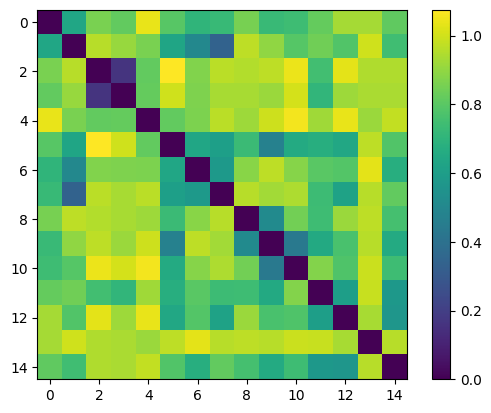

In [16]:

# Ваш список векторов
# vectors_ex = [np.array([1, 2]), np.array([2, 3]), np.array([3, 4])]

# Преобразование списка векторов в матрицу
matrix = np.vstack(embeddings)

# Расчет евклидового расстояния между векторами
distances = cdist(matrix, matrix, 'cosine')
print(distances)
# Построение графика
plt.imshow(distances)
plt.colorbar()
plt.show()
# # Определение минимального и максимального значения для обратного цветового шкалы
# vmin = distances.max()
# vmax = distances.min()

# # Построение графика с |обратными цветами
# plt.imshow(distances, interpolation='nearest', cmap='hot', vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.show()

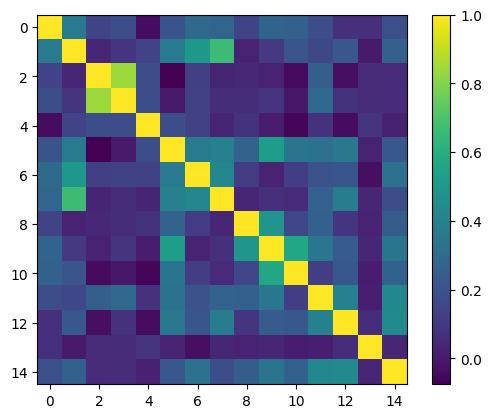

In [17]:

# Ваш список векторов
# vectors_ex = [np.array([1, 2]), np.array([2, 3]), np.array([3, 4])]

# Преобразование списка векторов в матрицу
#matrix = np.vstack(CLS_embedded_token_of_each_sentence_nparray)

# Расчет евклидового расстояния между векторами
distances = similarities

# Построение графика
plt.imshow(distances)
plt.colorbar()
plt.show()
# # Определение минимального и максимального значения для обратного цветового шкалы
# vmin = distances.max()
# vmax = distances.min()

# # Построение графика с обратными цветами
# plt.imshow(distances, interpolation='nearest', cmap='hot', vmin=vmin, vmax=vmax)
# plt.colorbar()
# plt.show()

In [18]:
np.sum(np.array(distances),axis=0)

array([3.5942025, 4.1341467, 2.6504238, 3.128145 , 1.9971035, 4.5075226,
       3.937914 , 3.9181387, 3.0448618, 4.142622 , 3.2114532, 4.3118887,
       3.6860938, 1.5140783, 4.054533 ], dtype=float32)

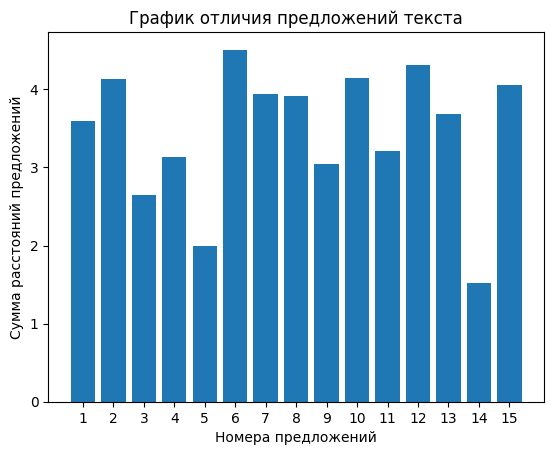

In [19]:

column_sums = np.sum(np.array(distances),axis=0)
# Построение столбчатой диаграммы с измененной нумерацией по оси x
plt.bar(np.arange(1, len(column_sums) + 1), column_sums)
plt.xlabel('Номера предложений')
plt.ylabel('Сумма расстояний предложений')
plt.title('График отличия предложений текста')
plt.xticks(np.arange(1, len(column_sums) + 1))
plt.show()

In [20]:
column_sums

array([3.5942025, 4.1341467, 2.6504238, 3.128145 , 1.9971035, 4.5075226,
       3.937914 , 3.9181387, 3.0448618, 4.142622 , 3.2114532, 4.3118887,
       3.6860938, 1.5140783, 4.054533 ], dtype=float32)

In [21]:
import statistics as stat
mean=stat.mean(column_sums)
up_bound=mean + stat.stdev(column_sums)
low_bound=mean - stat.stdev(column_sums)
print(mean,low_bound,up_bound)
rez=[list(column_sums).index(i) for i in column_sums if  i<low_bound ]
#rez=[list(column_sums).index(i) for i in column_sums if i <low_bound  or i>up_bound]
rez

3.4555418 2.588264016315061 4.322819681957644


[4, 13]

In [22]:
for i in rez:
    print(real_parts1[i])

ферма коробка 3 на 3 с размером 10
есть пряники


## Метод сравнение каждого с каждым

In [29]:
real_parts=['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
 'Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.',
 'Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.',
 'ферма коробка 3 на 3 с размером 10',
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане с общими габаритными размерами 32,8х24,1 м. Отметка низа покрытия помещений приемки топлива плюс 6,900.',
 'Наружные стены  и кровля котельной с АБК предусмотрены из легких трехслойных металлических панелей типа «Сэндвич».',
 'Сопряжение металлических надколонников со сборными железобетонными колоннами и монолитными стенами является жёстким. Соединение металлических ферм и балок с надколонниками выполнено шарнирным.',
 'Устойчивость каркаса достигается за счет жесткого соединения монолитных фундаментов с железобетонными сборными колоннами с шарнирным опиранием стропильных конструкций в поперечном направлении, вертикальными связями и распорками по верху колонн - в продольном направлении. Горизонтальная жесткость обеспечивается за счет связей по верхним и нижним поясам ферм.',
 'Балки покрытия выполнены из горячекатаных металлоконструкций двутаврового сечения, стропильные фермы по серии 1.460.3-23.98 из замкнутых гнутосварных профилей.',
 'Сборные железобетонные колонны по оси 1 сечением 400х400 по серии 1.423.1-3/88, в осях 2-6 сечением 500х400 по серии 1.423.1-5/88.',
 'есть пряники',
 'Перекрытия в осях 1-2, Б-Г выполнены из многопустотных железобетонных плит по серии 1.041-3 с монолитными участками по сборным железобетонным ригелям по серии 1.020-1/87.']

In [30]:
data = real_parts

In [31]:
def generate_seq_of_similarity_inc(data:list)->list:
    results,results_values=[],[]
    embedder = SentenceTransformer('distiluse-base-multilingual-cased')
    for i in range(len(data)):
        SENTENCE_NUM=i
        sentence_embeddings = embedder.encode(data, convert_to_tensor=True)
        given_sentence_embedding = sentence_embeddings[SENTENCE_NUM]
        cosine_similarities_bert = util.pytorch_cos_sim(given_sentence_embedding.reshape(1, -1), sentence_embeddings).numpy().flatten()
        results_values.append(cosine_similarities_bert)
        results.append(cosine_similarities_bert.argsort())
    return results,results_values

In [32]:
results,results_values=generate_seq_of_similarity_inc(data)

d:\Eneca\VsCode\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [33]:
results

[array([ 4, 12, 13,  2,  8, 11,  3, 14,  5, 10,  9,  7,  6,  1,  0],
       dtype=int64),
 array([13,  8,  2,  3,  9,  4, 11, 10, 12, 14,  0,  5,  6,  7,  1],
       dtype=int64),
 array([ 5, 10, 12,  9,  7,  1,  8, 14, 13,  6,  0,  4, 11,  3,  2],
       dtype=int64),
 array([10,  5, 13, 14,  8,  7, 12,  9,  1,  6,  4,  0, 11,  2,  3],
       dtype=int64),
 array([10,  0, 12,  9, 14,  7, 11,  8, 13,  6,  1,  3,  5,  2,  4],
       dtype=int64),
 array([ 2,  3, 13,  4,  0, 14,  8, 11, 10, 12,  6,  1,  7,  9,  5],
       dtype=int64),
 array([13,  9,  8, 10,  2,  3,  4, 11, 12,  0, 14,  5,  7,  1,  6],
       dtype=int64),
 array([ 2,  4,  8, 13, 10,  3,  9, 14, 11,  0, 12,  5,  6,  1,  7],
       dtype=int64),
 array([ 1, 13,  7,  2,  3,  4, 12,  6,  0, 10, 14, 11,  5,  9,  8],
       dtype=int64),
 array([ 4,  6,  2, 13,  7,  3,  1, 12,  0, 14, 11,  8,  5, 10,  9],
       dtype=int64),
 array([ 4,  2,  3, 13,  7,  6, 11,  8,  1, 12,  0, 14,  5,  9, 10],
       dtype=int64),
 array([13

In [34]:
def get_frequence(results,results_values,isPrint=False):
    sorts=[]
    for j in range(len(results)):
        sorts.append([i for i in results[j] if results_values[j][i]<0.1])
    flat_arr = [val for arr in sorts for val in arr]
    freq_dict = {val: flat_arr.count(val) for val in set(flat_arr)}
    sorted_freq_list=sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    if isPrint:
        global data
        print("\nЧастота встречаемости элементов (отсортированная, только >45%):")
        for val, count in sorted_freq_list: 
            if count > len(data)*0.5:
                print(f"{val}: {count}")
                print(data[val])
    return sorted_freq_list

In [35]:
sorted_freq_list=get_frequence(results,results_values,True)
sorted_freq_list


Частота встречаемости элементов (отсортированная, только >45%):
13: 14
есть пряники
2: 9
Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.
3: 9
Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.
4: 9
ферма коробка 3 на 3 с размером 10


[(13, 14),
 (2, 9),
 (3, 9),
 (4, 9),
 (7, 7),
 (8, 7),
 (9, 6),
 (12, 6),
 (10, 5),
 (1, 4),
 (14, 4),
 (0, 3),
 (5, 3),
 (6, 2),
 (11, 2)]

In [36]:
real_parts1

['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
 'Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.',
 'Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.',
 'ферма коробка 3 на 3 с размером 10',
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане 

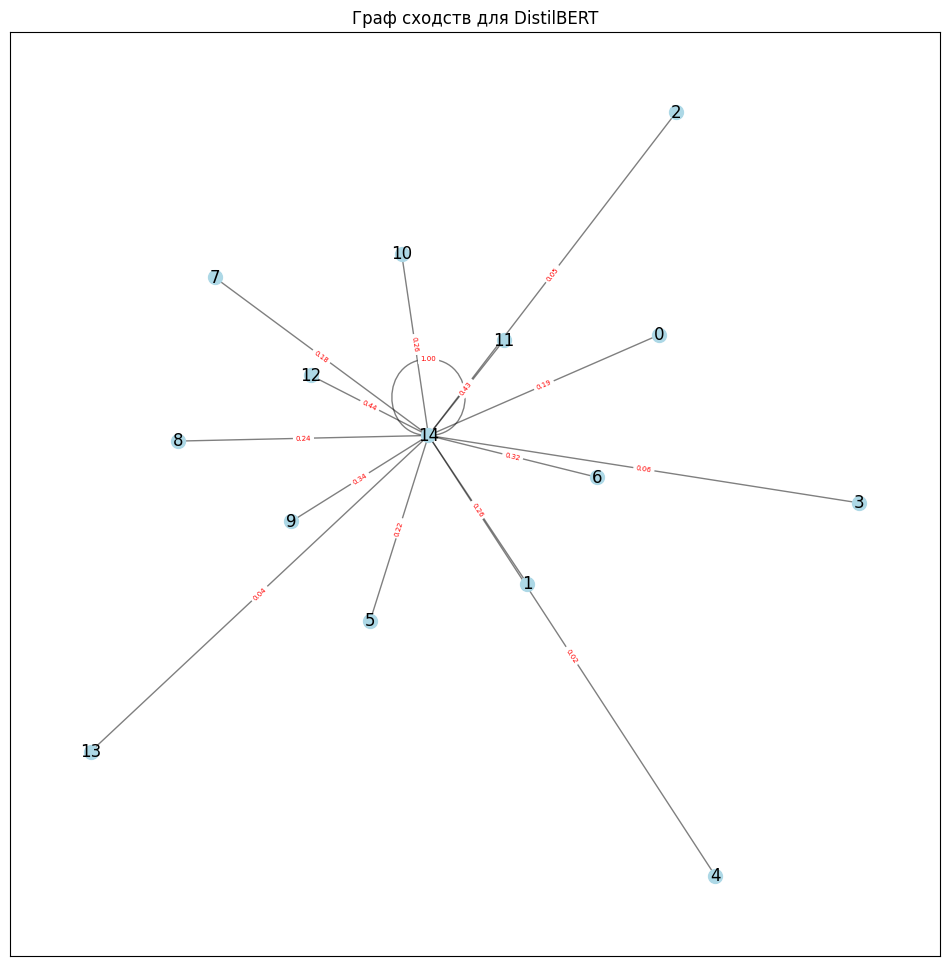

In [ ]:
import networkx as nx

G = nx.Graph()
edges = [(SENTENCE_NUM, idx, {'weight': cosine_similarities_bert[idx]}) for idx in range(len(real_parts1))]
G.add_edges_from(edges)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G, pos, {i: str(i) for i in range(len(G.nodes()))})
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{G[i][j]["weight"]:.2f}' for i, j in G.edges()}, font_color='red', font_size=5)
plt.title('Граф сходств для DistilBERT')
plt.show()

In [ ]:
real_parts1

['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
 'Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.',
 'Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.',
 'ферма коробка 3 на 3 с размером 10',
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане 

In [ ]:
res=[]

In [ ]:
res.append(cosine_similarities_bert.argsort())

In [ ]:
most_similar_indices_bert = cosine_similarities_bert.argsort()[::-1][1:3]
most_similar_indices_bert

array([7, 6], dtype=int64)

In [ ]:
print("Вариант 4 - Эмбеддинги Предложений (DistilBERT) + Косинусовое Сходство:")
for idx in most_similar_indices_bert:
    print(f"Похожее предложение ({idx}): {real_parts[idx]}")

Вариант 4 - Эмбеддинги Предложений (DistilBERT) + Косинусовое Сходство:
Похожее предложение (7): Пристройки в осях 6-14, А-Е имеют сложную форму в плане с общими габаритными размерами 32,8х24,1 м. Отметка низа покрытия помещений приемки топлива плюс 6,900.
Похожее предложение (6): АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. 


## Пробуем на записках из ENECA

In [37]:
real_parts=['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
 'Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.',
 'Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.',
 'ферма коробка 3 на 3 с размером 10',
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане с общими габаритными размерами 32,8х24,1 м. Отметка низа покрытия помещений приемки топлива плюс 6,900.',
 'Наружные стены  и кровля котельной с АБК предусмотрены из легких трехслойных металлических панелей типа «Сэндвич».',
 'Сопряжение металлических надколонников со сборными железобетонными колоннами и монолитными стенами является жёстким. Соединение металлических ферм и балок с надколонниками выполнено шарнирным.',
 'Устойчивость каркаса достигается за счет жесткого соединения монолитных фундаментов с железобетонными сборными колоннами с шарнирным опиранием стропильных конструкций в поперечном направлении, вертикальными связями и распорками по верху колонн - в продольном направлении. Горизонтальная жесткость обеспечивается за счет связей по верхним и нижним поясам ферм.',
 'Балки покрытия выполнены из горячекатаных металлоконструкций двутаврового сечения, стропильные фермы по серии 1.460.3-23.98 из замкнутых гнутосварных профилей.',
 'Сборные железобетонные колонны по оси 1 сечением 400х400 по серии 1.423.1-3/88, в осях 2-6 сечением 500х400 по серии 1.423.1-5/88.',
 'есть пряники',
 'Перекрытия в осях 1-2, Б-Г выполнены из многопустотных железобетонных плит по серии 1.041-3 с монолитными участками по сборным железобетонным ригелям по серии 1.020-1/87.']

In [67]:
real_parts=['Здание котельной одноэтажное с встроенным двухэтажным АБК и одноэтажными пристройками, включающими оперативные бункеры с гидравлическими толкателями, помещение топливоподачи и навес для твердого топлива.',
 'В осях 1-6, А-Ж имеет простую форму в плане с общими размерами 30,0х30,0 м  и  высотой до низа несущих конструкций покрытия  10,17 м с пристройкой помещений приемки топлива с отметкой до низа строительных конструкций 7,500 м.',
'Подземный железобетонный монолитный резервуар для технологических жидкостей с отметками дна минус 4,550 и минус 2,800, также является опорной конструкцией стальных колонн каркаса'
 'Каркас котельной смешанный из сборных железобетонных колонн с покрытием из металлических конструкций. Шаг колонн 6 м и 9 м, пролеты 24 м и 6 м.',
 'АБК в осях 1-2, А-Г запроектирован двухэтажным без подвала с размерами в плане 6,0х12,0 м с высотой этажа 3,3 м. ',
 'Пристройки в осях 6-14, А-Е имеют сложную форму в плане с общими габаритными размерами 32,8х24,1 м. Отметка низа покрытия помещений приемки топлива плюс 6,900.',
 'Наружные стены  и кровля котельной с АБК предусмотрены из легких трехслойных металлических панелей типа «Сэндвич».',
 'Сопряжение металлических надколонников со сборными железобетонными колоннами и монолитными стенами является жёстким. Соединение металлических ферм и балок с надколонниками выполнено шарнирным.',
 'Устойчивость каркаса достигается за счет жесткого соединения монолитных фундаментов с железобетонными сборными колоннами с шарнирным опиранием стропильных конструкций в поперечном направлении, вертикальными связями и распорками по верху колонн - в продольном направлении. Горизонтальная жесткость обеспечивается за счет связей по верхним и нижним поясам ферм.',
 'Балки покрытия выполнены из горячекатаных металлоконструкций двутаврового сечения, стропильные фермы по серии 1.460.3-23.98 из замкнутых гнутосварных профилей.',
 'Сборные железобетонные колонны по оси 1 сечением 400х400 по серии 1.423.1-3/88, в осях 2-6 сечением 500х400 по серии 1.423.1-5/88.',
 'Перекрытия в осях 1-2, Б-Г выполнены из многопустотных железобетонных плит по серии 1.041-3 с монолитными участками по сборным железобетонным ригелям по серии 1.020-1/87.']

In [76]:
data = real_parts

In [77]:
def generate_seq_of_similarity_inc(data:list)->list:
    results,results_values=[],[]
    embedder = SentenceTransformer('distiluse-base-multilingual-cased')
    for i in range(len(data)):
        SENTENCE_NUM=i
        sentence_embeddings = embedder.encode(data, convert_to_tensor=True)
        given_sentence_embedding = sentence_embeddings[SENTENCE_NUM]
        cosine_similarities_bert = util.pytorch_cos_sim(given_sentence_embedding.reshape(1, -1), sentence_embeddings).numpy().flatten()
        print(results_values)
        results_values.append(cosine_similarities_bert)
        results.append(cosine_similarities_bert.argsort())
    return results,results_values

In [79]:
results

[array([ 9,  5,  8, 10,  7,  6,  4,  3,  2,  1,  0], dtype=int64),
 array([ 5,  6,  8,  7,  9, 10,  2,  0,  3,  4,  1], dtype=int64),
 array([ 5,  0,  3,  1,  4, 10,  8,  9,  7,  6,  2], dtype=int64),
 array([ 6,  5,  7,  8,  9,  0,  2, 10,  4,  1,  3], dtype=int64),
 array([ 5,  7,  6, 10,  8,  0,  2,  9,  3,  1,  4], dtype=int64),
 array([ 1,  4,  9,  3,  0,  7,  2, 10,  8,  6,  5], dtype=int64),
 array([ 3,  4,  1,  9,  0, 10,  8,  5,  2,  7,  6], dtype=int64),
 array([ 4,  3,  8,  5,  1,  9,  0, 10,  2,  6,  7], dtype=int64),
 array([ 7,  1,  0,  3,  5,  4,  6,  2,  9, 10,  8], dtype=int64),
 array([ 0,  5,  3,  1,  7,  6,  4,  8, 10,  2,  9], dtype=int64),
 array([ 4,  0,  5,  1,  7,  3,  2,  6,  8,  9, 10], dtype=int64)]

In [78]:
results,results_values=generate_seq_of_similarity_inc(data)

d:\Eneca\VsCode\.venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[]
[array([1.        , 0.36290926, 0.30115277, 0.29612193, 0.27349484,
       0.1446104 , 0.2701805 , 0.25774896, 0.17816812, 0.06805486,
       0.18761756], dtype=float32)]
[array([1.        , 0.36290926, 0.30115277, 0.29612193, 0.27349484,
       0.1446104 , 0.2701805 , 0.25774896, 0.17816812, 0.06805486,
       0.18761756], dtype=float32), array([0.36290926, 1.0000002 , 0.32417476, 0.49913105, 0.66217625,
       0.03073522, 0.10148209, 0.20681393, 0.15744287, 0.2178189 ,
       0.25531065], dtype=float32)]
[array([1.        , 0.36290926, 0.30115277, 0.29612193, 0.27349484,
       0.1446104 , 0.2701805 , 0.25774896, 0.17816812, 0.06805486,
       0.18761756], dtype=float32), array([0.36290926, 1.0000002 , 0.32417476, 0.49913105, 0.66217625,
       0.03073522, 0.10148209, 0.20681393, 0.15744287, 0.2178189 ,
       0.25531065], dtype=float32), array([0.30115277, 0.32417476, 0.99999994, 0.31257313, 0.33932817,
       0.21104984, 0.5595986 , 0.48274207, 0.39164513, 0.45449266,
       0.3

In [75]:
results

[array([ 9,  5,  8, 10,  7,  6,  4,  3,  2,  1,  0], dtype=int64),
 array([ 5,  6,  8,  7,  9, 10,  2,  0,  3,  4,  1], dtype=int64),
 array([ 5,  0,  3,  1,  4, 10,  8,  9,  7,  6,  2], dtype=int64),
 array([ 6,  5,  7,  8,  9,  0,  2, 10,  4,  1,  3], dtype=int64),
 array([ 5,  7,  6, 10,  8,  0,  2,  9,  3,  1,  4], dtype=int64),
 array([ 1,  4,  9,  3,  0,  7,  2, 10,  8,  6,  5], dtype=int64),
 array([ 3,  4,  1,  9,  0, 10,  8,  5,  2,  7,  6], dtype=int64),
 array([ 4,  3,  8,  5,  1,  9,  0, 10,  2,  6,  7], dtype=int64),
 array([ 7,  1,  0,  3,  5,  4,  6,  2,  9, 10,  8], dtype=int64),
 array([ 0,  5,  3,  1,  7,  6,  4,  8, 10,  2,  9], dtype=int64),
 array([ 4,  0,  5,  1,  7,  3,  2,  6,  8,  9, 10], dtype=int64)]

In [74]:
results_values

[array([0.18761756, 0.06805486, 0.17816812, 0.25774896, 0.2701805 ,
        0.1446104 , 0.27349484, 0.29612193, 0.30115277, 0.36290926,
        1.        ], dtype=float32),
 array([0.25531065, 0.2178189 , 0.15744287, 0.20681393, 0.10148209,
        0.03073522, 0.66217625, 0.49913105, 0.32417476, 1.0000002 ,
        0.36290926], dtype=float32),
 array([0.3429739 , 0.45449266, 0.39164513, 0.48274207, 0.5595986 ,
        0.21104984, 0.33932817, 0.31257313, 0.99999994, 0.32417476,
        0.30115277], dtype=float32),
 array([0.32444406, 0.21155208, 0.19852382, 0.11827111, 0.03049088,
        0.11407914, 0.4173665 , 1.        , 0.31257313, 0.49913105,
        0.29612193], dtype=float32),
 array([0.18239243, 0.38027316, 0.26328912, 0.05877957, 0.07390295,
        0.03888728, 0.99999994, 0.4173665 , 0.33932817, 0.66217625,
        0.27349484], dtype=float32),
 array([0.24299169, 0.08418224, 0.25806358, 0.15156423, 0.48693764,
        1.        , 0.03888728, 0.11407914, 0.21104984, 0.03073522,

In [53]:
results

[array([ 9,  5,  8, 10,  7,  6,  4,  3,  2,  1,  0], dtype=int64),
 array([ 5,  6,  8,  7,  9, 10,  2,  0,  3,  4,  1], dtype=int64),
 array([ 5,  0,  3,  1,  4, 10,  8,  9,  7,  6,  2], dtype=int64),
 array([ 6,  5,  7,  8,  9,  0,  2, 10,  4,  1,  3], dtype=int64),
 array([ 5,  7,  6, 10,  8,  0,  2,  9,  3,  1,  4], dtype=int64),
 array([ 1,  4,  9,  3,  0,  7,  2, 10,  8,  6,  5], dtype=int64),
 array([ 3,  4,  1,  9,  0, 10,  8,  5,  2,  7,  6], dtype=int64),
 array([ 4,  3,  8,  5,  1,  9,  0, 10,  2,  6,  7], dtype=int64),
 array([ 7,  1,  0,  3,  5,  4,  6,  2,  9, 10,  8], dtype=int64),
 array([ 0,  5,  3,  1,  7,  6,  4,  8, 10,  2,  9], dtype=int64),
 array([ 4,  0,  5,  1,  7,  3,  2,  6,  8,  9, 10], dtype=int64)]

In [66]:
results_values

[array([1.        , 0.36290926, 0.30115277, 0.29612193, 0.27349484,
        0.1446104 , 0.2701805 , 0.25774896, 0.17816812, 0.06805486,
        0.18761756], dtype=float32),
 array([0.36290926, 1.0000002 , 0.32417476, 0.49913105, 0.66217625,
        0.03073522, 0.10148209, 0.20681393, 0.15744287, 0.2178189 ,
        0.25531065], dtype=float32),
 array([0.30115277, 0.32417476, 0.99999994, 0.31257313, 0.33932817,
        0.21104984, 0.5595986 , 0.48274207, 0.39164513, 0.45449266,
        0.3429739 ], dtype=float32),
 array([0.29612193, 0.49913105, 0.31257313, 1.        , 0.4173665 ,
        0.11407914, 0.03049088, 0.11827111, 0.19852382, 0.21155208,
        0.32444406], dtype=float32),
 array([0.27349484, 0.66217625, 0.33932817, 0.4173665 , 0.99999994,
        0.03888728, 0.07390295, 0.05877957, 0.26328912, 0.38027316,
        0.18239243], dtype=float32),
 array([0.1446104 , 0.03073522, 0.21104984, 0.11407914, 0.03888728,
        1.        , 0.48693764, 0.15156423, 0.25806358, 0.08418224,

In [65]:
import statistics as stat
for i in range(len(results_values)):
    print(stat.mean(results_values[i]))

0.30364174
0.34709048
0.42906645
0.32023215
0.33544457
0.25119102
0.36473522
0.31350973
0.34025344
0.33703136
0.36388767


In [ ]:
import statistics as stat
mean=stat.mean(column_sums)
up_bound=mean + stat.stdev(column_sums)
low_bound=mean - stat.stdev(column_sums)
print(mean,low_bound,up_bound)
rez=[list(column_sums).index(i) for i in column_sums if i < low_bound]
rez

In [47]:
def get_frequence(results,results_values,isPrint=False):
    sorts=[]
    for j in range(len(results)):
        sorts.append([i for i in results[j] if results_values[j][i]<0.1])
    flat_arr = [val for arr in sorts for val in arr]
    freq_dict = {val: flat_arr.count(val) for val in set(flat_arr)}
    sorted_freq_list=sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    if isPrint:
        global data
        print("\nЧастота встречаемости элементов (отсортированная, только >45%):")
        for val, count in sorted_freq_list: 
            if count > len(data)*0.5:
                print(f"{val}: {count}")
                print(data[val])
    return sorted_freq_list

In [48]:
sorted_freq_list=get_frequence(results,results_values,True)
sorted_freq_list


Частота встречаемости элементов (отсортированная, только >45%):
13: 14
есть пряники
2: 9
Проектируемая молочно-товарная ферма состоит из двух коровников на 350 голов и доильно-молочного блока.
3: 9
Проектируемая ферма состоит из двух коровников на 550 голов и доильно-молочного блока.
4: 9
ферма коробка 3 на 3 с размером 10


[(13, 14),
 (2, 9),
 (3, 9),
 (4, 9),
 (7, 7),
 (8, 7),
 (9, 6),
 (12, 6),
 (10, 5),
 (1, 4),
 (14, 4),
 (0, 3),
 (5, 3),
 (6, 2),
 (11, 2)]

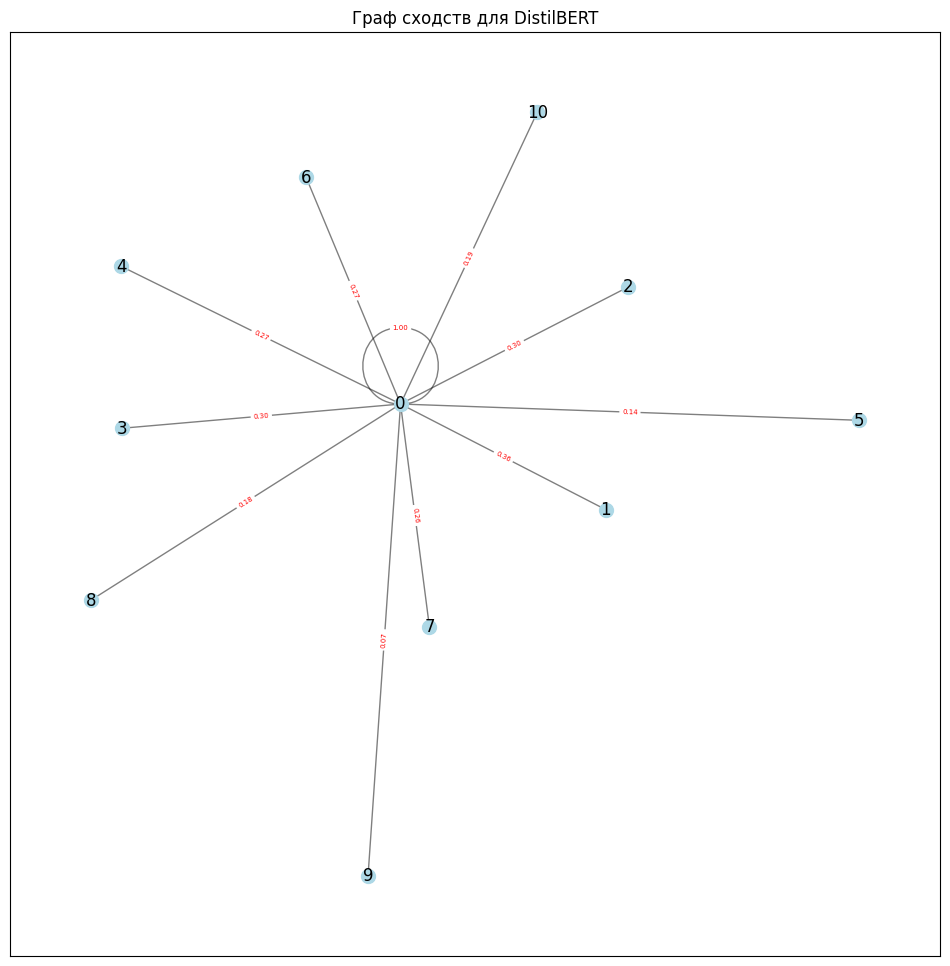

In [23]:
import networkx as nx
SENTENCE_NUM=0
cosine_similarities_bert=results_values[0]
data=real_parts

G = nx.Graph()
edges = [(SENTENCE_NUM, idx, {'weight': cosine_similarities_bert[idx]}) for idx in range(len(data))]
G.add_edges_from(edges)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')
nx.draw_networkx_labels(G, pos, {i: str(i) for i in range(len(G.nodes()))})
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(i, j): f'{G[i][j]["weight"]:.2f}' for i, j in G.edges()}, font_color='red', font_size=5)
plt.title('Граф сходств для DistilBERT')
plt.show()